<a href="https://colab.research.google.com/github/wei666-myst/crypto-btc-and-vix-corr/blob/main/%5BCryptofin%5DHello_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python的基礎操作
- 列印
- 變數型態 (字串/數值)
- 迴圈概念
- 四則運算/向量運算

In [ ]:
# Print Hello, world.
print('Hello, world.')

Hello, world.


In [ ]:
# Print number, float
a = 2**(0.5)
print(a')
print('{}'.format(a))
print('{:.2f}'.format(a))

SyntaxError: unterminated string literal (detected at line 3) (ipython-input-4241254008.py, line 3)

In [ ]:
# print 1,2, ...,20
for i in range(20):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
# sum of the series, 1,2,...,20
total = 0
for i in range(1,21):
  total = total +i
print(total)

210


In [ ]:
# import the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# sum of the series via numpy package
arr = np.arange(1,21)
arr.sum()

np.int64(210)

In [ ]:
# calculate the return
p0 = 100
p1 = 150
ret = (p1-p0)/p0
ret = ret*100
print('報酬率: {}%'.format(ret))
print('年化報酬率: {}%'.format(ret*12))


報酬率: 50.0%
年化報酬率: 600.0%


# 如何獲取加密貨幣的交易資料
- 以比特幣為例
- 利用yfinance套件
- 資料型態 (dataframe)
- 資料整理

In [ ]:
# 如何獲取加密貨幣資料
# 1.安裝套件 (目前colab已安裝此套件了)
#!pip install yfinance

In [ ]:
# 2.匯入必要套件
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
# 3.下載資料(yahoo finance https://finance.yahoo.com/)
data = yf.download('BTC-USD',start='2016-01-01')

/tmp/ipython-input-8862879.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start='2016-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
# 4. 查看資料
#data
#data.head()
#data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3603 entries, 2016-01-01 to 2025-11-12
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3603 non-null   float64
 1   (High, BTC-USD)    3603 non-null   float64
 2   (Low, BTC-USD)     3603 non-null   float64
 3   (Open, BTC-USD)    3603 non-null   float64
 4   (Volume, BTC-USD)  3603 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 168.9 KB


In [ ]:
# 5. 選取資料期間: 從2020到現在
test = data.loc['2020-01-01':]

In [ ]:
test

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...
2025-11-07,103372.406250,104052.914062,99257.054688,101286.242188,92168030081
2025-11-08,102282.117188,103373.562500,101458.039062,103371.703125,51446691095


In [ ]:
# 6. 選取資料變數
test = test[['Close']]
test.head()

Price,Close
Ticker,BTC-USD
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


In [ ]:
# 7. 重新命名變數
test.columns = ['price_btc']
test.head()

,price_btc
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


In [ ]:
# 8. 建立每日報酬率
test['ret_btc'] = test.price_btc.pct_change()
test.head()

/tmp/ipython-input-12430389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ret_btc'] = test.price_btc.pct_change()


,price_btc,ret_btc
Date,,
2020-01-01,7200.174316,NaN
2020-01-02,6985.470215,-0.029819
2020-01-03,7344.884277,0.051452
2020-01-04,7410.656738,0.008955
2020-01-05,7411.317383,0.000089


In [ ]:
test.price_btc.corr(test.ret_btc)

np.float64(0.002636233416930949)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2142 entries, 2020-01-01 to 2025-11-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  2142 non-null   float64
 1   ret_btc    2141 non-null   float64
dtypes: float64(2)
memory usage: 50.2 KB


In [ ]:
# 9. 建立每日高低價差
# 10. 計算報酬率的平均值
a = test.ret_btc.mean()*365
print('比特幣的年化報酬率是{:.4f}'.format(a))
# 11. 計算報酬率的標準差
b = test.ret_btc.std()*(365)**(0.5)
print('比特幣的年化波動率是{:.4f}'.format(b))

比特幣的年化報酬率是0.6457
比特幣的年化波動率是0.6136


In [ ]:
data = yf.download('^GSPC',start='2016-01-01')
data

/tmp/ipython-input-2306285380.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC',start='2016-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2016-01-04,2012.660034,2038.199951,1989.680054,2038.199951,4304880000
2016-01-05,2016.709961,2021.939941,2004.170044,2013.780029,3706620000
2016-01-06,1990.260010,2011.709961,1979.050049,2011.709961,4336660000
2016-01-07,1943.089966,1985.319946,1938.829956,1985.319946,5076590000
2016-01-08,1922.030029,1960.400024,1918.459961,1945.969971,4664940000
...,...,...,...,...,...
2025-11-05,6796.290039,6829.779785,6763.109863,6769.770020,5939600000
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000


In [ ]:
test = data.loc['2020':]
test

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
...,...,...,...,...,...
2025-11-05,6796.290039,6829.779785,6763.109863,6769.770020,5939600000
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000


In [ ]:
test = test[['Close']]

In [ ]:
test.columns = ['price_sp500']
test['ret_sp500'] = test.price_sp500.pct_change()
test

/tmp/ipython-input-2089101976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ret_sp500'] = test.price_sp500.pct_change()


,price_sp500,ret_sp500
Date,,
2020-01-02,3257.850098,NaN
2020-01-03,3234.850098,-0.007060
2020-01-06,3246.280029,0.003533
2020-01-07,3237.179932,-0.002803
2020-01-08,3253.050049,0.004902
...,...,...
2025-11-05,6796.290039,0.003654
2025-11-06,6720.319824,-0.011178
2025-11-07,6728.799805,0.001262


In [ ]:
a = test.ret_sp500.mean()*252
print('S&P500指數年化報酬率是{:.4f}'.format(a))
b = test.ret_sp500.std()*(252)**(0.5)
print('S&P500指數年化波動率是{:.4f}'.format(b))
test.ret_sp500.min()
test.ret_sp500.idxmin()
test.ret_sp500.max()

S&P500指數年化報酬率是0.1494
S&P500指數年化波動率是0.2109


0.09515387644904849

## 小結
- 我們可以輕易地利用Python協助我們下載並分析加密貨幣的資料

## 練習題 (HW1)
1. 利用套件yfinance下載比特幣交易資料，其中包含，期間為`2019/01/01 - 2023/8/31`
2. 利用此資料的收盤價計算出比特幣報酬率
3. 根據上題的報酬率結果,計算其平均報酬率,標準差, 最大,最小等統計量 (註:需年化調整)
4. 利用上述步驟,計算S&P500指數報酬的各項統計量
5. 比較比特幣與S&P500指數的績效表現


In [ ]:
#0 import package
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
#1 download data from yahoo-finance
data = yf.download('BTC-USD')
data = data['2019':'2023-08']
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1704 entries, 2019-01-01 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1704 non-null   float64
 1   High       1704 non-null   float64
 2   Low        1704 non-null   float64
 3   Close      1704 non-null   float64
 4   Adj Close  1704 non-null   float64
 5   Volume     1704 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.2 KB


In [ ]:
#2 利用收盤價計算出比特幣報酬率
data = data[['Adj Close']]
data.columns = ['price_btc']
data['ret_btc'] = np.log(data.price_btc).diff()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1704 entries, 2019-01-01 to 2023-08-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  1704 non-null   float64
 1   ret_btc    1703 non-null   float64
dtypes: float64(2)
memory usage: 39.9 KB


In [ ]:
#3 計算其平均報酬率,標準差, 最大,最小等統計量
print('比特幣報酬之敘述統計量')
print(data.ret_btc.describe())
mean_btc = data.ret_btc.mean()
std_btc = data.ret_btc.std()
max_btc = data.ret_btc.max()
min_btc = data.ret_btc.min()
print('年化報酬率: {:.4f}%'.format(mean_btc*365*100))
print('年化標準差: {:.4f}%'.format(std_btc*365**(0.5)*100))
print('年化最大值: {:.4f}%'.format(max_btc*365*100))
print('年化最小值: {:.4f}%'.format(min_btc*365*100))

比特幣報酬之敘述統計量
count    1703.000000
mean        0.001121
std         0.036266
min        -0.464730
25%        -0.013890
50%         0.000741
75%         0.016500
max         0.171821
Name: ret_btc, dtype: float64
年化報酬率: 40.9166%
年化標準差: 69.2858%
年化最大值: 6271.4505%
年化最小值: -16962.6514%


In [ ]:
#4 計算S&P500的情況
#4.1 下載資料
data = yf.download('^gspc')
data = data['2019':'2023-08']
data = data[['Adj Close']]
data.columns = ['price_spx']
data['ret_spx'] = np.log(data.price_spx).diff()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#4.2 計算敘述統計
print('S&P 500指數報酬之敘述統計量')
print(data.ret_spx.describe())
mean_spx = data.ret_spx.mean()
std_spx = data.ret_spx.std()
max_spx = data.ret_spx.max()
min_spx = data.ret_spx.min()

print('年化報酬率: {:.4f}%'.format(mean_spx*252*100))
print('年化標準差: {:.4f}%'.format(std_spx*252**(0.5)*100))
print('年化最大值: {:.4f}%'.format(max_spx*252*100))
print('年化最小值: {:.4f}%'.format(min_spx*252*100))

S&P 500指數報酬之敘述統計量
count    1174.000000
mean        0.000499
std         0.013811
min        -0.127652
25%        -0.005275
50%         0.000884
75%         0.007291
max         0.089683
Name: ret_spx, dtype: float64
年化報酬率: 12.5674%
年化標準差: 21.9247%
年化最大值: 2260.0175%
年化最小值: -3216.8354%


In [ ]:
#5.比較績效
#5.1
print('{:.4f};{:.4f}'.format(mean_btc*365,mean_spx*252))
print('比特幣報酬高於S&P500指數')
#5.2
print('{:.4f};{:.4f}'.format(std_btc*365**(0.5),std_spx*252**(0.5)))
print('比特幣風險高於S&P500指數')
#5.3
sharpe_btc = mean_btc*365/std_btc*365**(0.5)
sharpe_spx = mean_spx*252/std_spx*252**(0.5)
print('{:.4f};{:.4f}'.format(sharpe_btc,sharpe_spx))
print('比特幣績效優於S&P500指數')

0.4092;0.1257
比特幣報酬高於S&P500指數
0.6929;0.2192
比特幣風險高於S&P500指數
215.5503;144.4487
比特幣風險高於S&P500指數


# 如何了解資產之間的關聯
- 相關係數
- 計量分析

## 相關係數
- 下載資料
- 計算報酬率
- 計算相關係數

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [12]:
# 下載資料(BTC)
data = yf.download('BTC-USD',start='2020-01-01')
data_1 = yf.download('^VIX',start='2020-01-01')

/tmp/ipython-input-3035454337.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3035454337.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download('^VIX',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


In [13]:
## 相關係數 (BTC, ETH)
data = data[['Close']]
data.columns = ['price_btc']
data_1 = data_1[['Close']]
data_1.columns = ['price_^VIX']

In [14]:
data_1.head()

,price_^VIX
Date,
2020-01-02,12.47
2020-01-03,14.02
2020-01-06,13.85
2020-01-07,13.79
2020-01-08,13.45


In [15]:
# 合併資料(當index相同下)
data_m = data.join(data_1)

In [16]:
data_m

,price_btc,price_^VIX
Date,,
2020-01-01,7200.174316,NaN
2020-01-02,6985.470215,12.47
2020-01-03,7344.884277,14.02
2020-01-04,7410.656738,NaN
2020-01-05,7411.317383,NaN
...,...,...
2025-12-01,86321.570312,17.24
2025-12-02,91350.203125,16.59
2025-12-03,93527.804688,16.08


In [21]:
# 建立各自報酬率
data_m['ret_btc'] = data_m.price_btc.pct_change()
data_m['ret_vix'] = data_m['price_^VIX'].pct_change()

/tmp/ipython-input-2990787043.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_m['ret_vix'] = data_m['price_^VIX'].pct_change()


In [27]:
# 計算相關係數
# 針對報酬率來作為變數，而不是用價格
corr_btc_vix = data_m.ret_btc.corr(data_m.ret_vix)
print('BTC與vix之相關係數為{:.4f}'.format(corr_btc_vix))

BTC與vix之相關係數為-0.3219


In [30]:
# 建立每個月的相關係數 (運用resample的方式)
corr_btc_vix_month = data_m.resample('ME').apply(lambda x: x['ret_btc'].corr(x['ret_vix']))
print(corr_btc_vix_month)

Date
2020-01-31    0.046210
2020-02-29   -0.125700
2020-03-31   -0.604314
2020-04-30   -0.427698
2020-05-31    0.048476
                ...   
2025-08-31   -0.568511
2025-09-30    0.055441
2025-10-31   -0.545164
2025-11-30   -0.429076
2025-12-31   -0.856022
Freq: ME, Length: 72, dtype: float64


<Axes: xlabel='Date'>

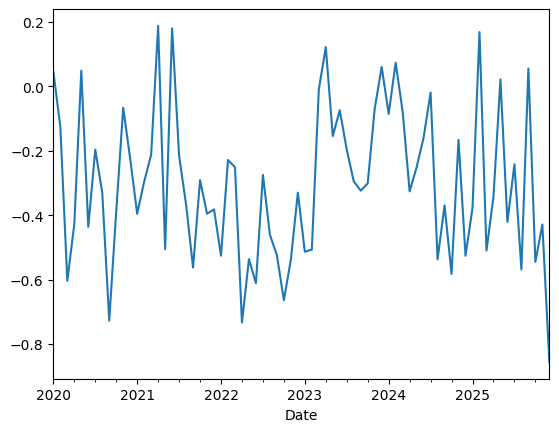

In [31]:
corr_btc_vix_month.plot()


In [33]:
# 將結果匯出成csv (可用excel開啟)
corr_btc_vix_month.to_csv('corr_month.csv')


In [36]:
# 將整理好資料 上傳至colab
data_final = pd.read_csv('corr_month.csv')
data_final.index = pd.to_datetime(data_final.Date)
data_final.drop('Date',axis=1,inplace=True)
data_final.columns = ['corr_btc_vix'] # 修正欄位名稱，使其符合實際內容和欄位數量
data_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2020-01-31 to 2025-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   corr_btc_vix  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


## 計量分析
- 下載資料
- 合併資料
- 跑簡單線性回歸 (計量分析)
$$
y_t = \alpha + \beta_1 x_t + \epsilon_t
$$
或者是預測模型
$$
y_t = \alpha + \beta_1 x_{t-1} + \epsilon_t
$$

### 範例: 加密貨幣與美股之間的關係
- 下載資料: BTC和S&P500

In [ ]:
# 下載資料(BTC, S&P500)
data = yf.download('BTC-USD',start='2020-01-01')
data_1 = yf.download('^gspc',start='2020-01-01')
## 整理資料 (BTC, S&P500)
data = data[['Close']]
data.columns = ['price_btc']
data_1 = data_1[['Close']]
data_1.columns = ['price_sp500']

/tmp/ipython-input-328365642.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-328365642.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download('^gspc',start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
# 合併資料(當index相同下)
data_m = data_1.join(data)
data_m.head()

,price_sp500,price_btc
Date,,
2020-01-02,3257.850098,6985.470215
2020-01-03,3234.850098,7344.884277
2020-01-06,3246.280029,7769.219238
2020-01-07,3237.179932,8163.692383
2020-01-08,3253.050049,8079.862793


In [ ]:
# 建立各自報酬率
data_m['ret_btc'] = data_m.price_btc.pct_change()
data_m['ret_sp500'] = data_m.price_sp500.pct_change()
data_m.head()

/tmp/ipython-input-2030919949.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_m['ret_btc'] = data_m.price_btc.pct_change()


,price_sp500,price_btc,ret_btc,ret_sp500
Date,,,,
2020-01-02,3257.850098,6985.470215,NaN,NaN
2020-01-03,3234.850098,7344.884277,0.051452,-0.007060
2020-01-06,3246.280029,7769.219238,0.057773,0.003533
2020-01-07,3237.179932,8163.692383,0.050774,-0.002803
2020-01-08,3253.050049,8079.862793,-0.010269,0.004902


In [ ]:
data_m['ret_sp500_1'] = data_m.ret_sp500.shift()

In [ ]:
# 計算相關係數
a = data_m.ret_btc.corr(data_m.ret_sp500)
print('BTC與S&P500的相關係數是{:.4f}'.format(a))

BTC與S&P500的相關係數是0.3749


In [ ]:
# S&P500日報酬對BTC日報酬之影響
y = data_m.ret_btc
x = sm.add_constant(data_m.ret_sp500)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())
#p-value<0.01 (***) <0.05 (**) <0.1 (*)

                            OLS Regression Results                            
Dep. Variable:                ret_btc   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           2.23e-50
Time:                        03:29:51   Log-Likelihood:                 2804.5
No. Observations:                1473   AIC:                            -5605.
Df Residuals:                    1471   BIC:                            -5594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      2.091      0.0

### 範例: BTC報酬是否受到美國EPU的影響

In [ ]:
#下載資料
data = yf.download('BTC-USD')
data = data['2018':]
data = data[['Adj Close','Volume']]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 整理資料
data.columns = ['price_btc','tv_btc'] #tv: trading volume
# 生成報酬率/變化率
data['ret_btc'] = np.log(data.price_btc).diff()
data['ret_tv'] = np.log(data.tv_btc).diff()

In [ ]:
# 更改頻率至月頻率
data_m = data.resample('M').sum()
data_m['price_btc'] = data['price_btc'].resample('M').last()
data_m.head()

,price_btc,tv_btc,ret_btc,ret_tv
Date,,,,
2018-01-31,10221.099609,416247858176,-0.289813,-0.246716
2018-02-28,10397.900391,229717780480,0.017150,-0.147821
2018-03-31,6973.529785,193751709184,-0.399482,-0.420907
2018-04-30,9240.549805,196550010624,0.281480,0.644475
2018-05-31,7494.169922,197611709696,-0.209476,-0.525775


In [ ]:
# 匯出csv檔案
data_m.to_csv('BTCprice.csv')

In [ ]:
# 匯入整理後資料
data_all = pd.read_csv('/content/all_data.csv')
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       69 non-null     object 
 1   price_btc  69 non-null     float64
 2   tv_btc     69 non-null     float64
 3   ret_btc    69 non-null     float64
 4   ret_tv     69 non-null     float64
 5   epu_us     69 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.4+ KB


In [ ]:
data_all.index = pd.to_datetime(data_all.Date)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2018-01-31 to 2023-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       69 non-null     object 
 1   price_btc  69 non-null     float64
 2   tv_btc     69 non-null     float64
 3   ret_btc    69 non-null     float64
 4   ret_tv     69 non-null     float64
 5   epu_us     69 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.8+ KB


In [ ]:
# 建立EPU變化率
data_all['ret_epu'] = data_all.epu_us.pct_change()
data_all['ret_epu_1'] = data_all.epu_us.pct_change().shift()

In [ ]:
# 相關係數
data_all.ret_btc.corr(data_all.ret_epu)
# 2020年的相關係數
data_all['2023'].ret_btc.corr(data_all['2023'].ret_epu_1)

<ipython-input-72-591678dd9a42>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_all['2023'].ret_btc.corr(data_all['2023'].ret_epu_1)


-0.003805007246456761

In [ ]:
# 回歸分析
y = data_all.ret_btc
x = sm.add_constant(data_all.ret_epu_1)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_btc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                  0.006405
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.936
Time:                        06:09:44   Log-Likelihood:                 10.531
No. Observations:                  67   AIC:                            -17.06
Df Residuals:                      65   BIC:                            -12.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0144      0.026      0.560      0.5

In [ ]:
# 對變數進行回歸分析 (模型1)
data_final['ret_epu'] = data_final.epu.pct_change()

In [ ]:
# 對變數進行回歸分析 (模型1)
# y: 相關係數 x: EPU的變化率
y = data_final.corr_btc_eth
x = sm.add_constant(data_final.ret_epu)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           corr_btc_eth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.003416
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.954
Time:                        03:08:13   Log-Likelihood:                 53.369
No. Observations:                  59   AIC:                            -102.7
Df Residuals:                      57   BIC:                            -98.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8423      0.013     64.320      0.0

In [ ]:
# 對變數進行回歸分析 (模型2)
# y: 相關係數 x: EPU的變化率
y = data_final.corr_btc_eth
x = sm.add_constant(data_final.ret_epu.shift())
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           corr_btc_eth   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.927
Date:                Thu, 02 Nov 2023   Prob (F-statistic):             0.0926
Time:                        03:11:04   Log-Likelihood:                 53.628
No. Observations:                  58   AIC:                            -103.3
Df Residuals:                      56   BIC:                            -99.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8377      0.013     64.508      0.0

# 量化投資策略
- 獲取歷史資料
- 設定進場出場條件 (投資策略)
- 計算報酬與績效

In [ ]:
# import package
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
# 以BTC為例
data = yf.download('BTC-USD')
data = data['2018':]
data = data[['Close']]
data.columns = ['price_btc']
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2132 entries, 2018-01-01 to 2023-11-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  2132 non-null   float64
dtypes: float64(1)
memory usage: 33.3 KB


In [ ]:
# 利用移動平均建立投資策略
# 建立移動平均線
data['ma5'] = data.price_btc.rolling(5).mean()
# 建立多空訊號 (注意時間順序)
data['ma5_rule'] = (data.ma5<data.price_btc).shift()
data.ma5_rule = data.ma5_rule.replace({True:1,False:0})
# 建立累積報酬率 (績效)
data['ret_btc'] = np.log(data.price_btc).diff()
data['ma5_cumret'] = (data.ret_btc*data.ma5_rule).cumsum()
# 建立基準績效 (buy-and-hold)
data['bh_cumret'] = data.ret_btc.cumsum()
data.head()

,price_btc,ma5,ma5_rule,ret_btc,ma5_cumret,bh_ret,bh_cumret
Date,,,,,,,
2018-01-01,13657.200195,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,14982.099609,NaN,0.0,0.092589,0.0,0.092589,0.092589
2018-01-03,15201.000000,NaN,0.0,0.014505,0.0,0.107094,0.107094
2018-01-04,15599.200195,NaN,0.0,0.025858,0.0,0.132953,0.132953
2018-01-05,17429.500000,15373.8,0.0,0.110945,0.0,0.243897,0.243897


<Axes: xlabel='Date'>

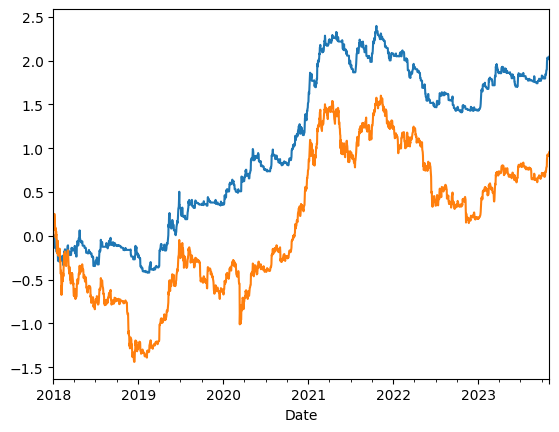

In [ ]:
# 比較累積報酬率 (策略vs基準)
data.cum_ret.plot()
data.bh_ret.plot()

In [ ]:
# 以BTC為例
data = yf.download('BTC-USD')
data = data['2018':]
data = data[['Close']]
data.columns = ['price_btc']
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2132 entries, 2018-01-01 to 2023-11-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  2132 non-null   float64
dtypes: float64(1)
memory usage: 33.3 KB


In [ ]:
# 利用動能策略建立投資策略
# 計算日報酬
data['ret_btc'] = np.log(data.price_btc).diff()
# 計算過去5日報酬
data['mom5'] = data.ret_btc.rolling(5).sum()
# 建立多空訊號 (注意時間順序)
data['mom5_rule'] = (data.mom5>0).shift()
data.mom5_rule = data.mom5_rule.replace({True:1,False:0})
# 建立累積報酬率 (績效)
data['mom5_cumret'] = (data.ret_btc*data.mom5_rule).cumsum()
# 建立基準績效 (buy-and-hold)
data['bh_cumret'] = data.ret_btc.cumsum()
data.head()

,price_btc,ma5,ma5_rule,ret_btc,ma5_cumret,bh_ret,bh_cumret,mom5,mom5_rule,mom5_cumret
Date,,,,,,,,,,
2018-01-01,13657.200195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,14982.099609,NaN,0.0,0.092589,0.0,0.092589,0.092589,NaN,0.0,0.0
2018-01-03,15201.000000,NaN,0.0,0.014505,0.0,0.107094,0.107094,NaN,0.0,0.0
2018-01-04,15599.200195,NaN,0.0,0.025858,0.0,0.132953,0.132953,NaN,0.0,0.0
2018-01-05,17429.500000,15373.8,0.0,0.110945,0.0,0.243897,0.243897,NaN,0.0,0.0


<Axes: xlabel='Date'>

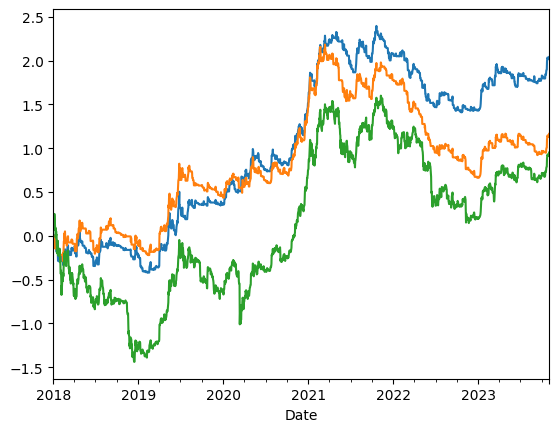

In [ ]:
# 比較累積報酬率 (策略vs基準)
data.ma5_cumret.plot()
data.mom5_cumret.plot()
data.bh_cumret.plot()
# 小結:
# 移動平均或動能策略都是看價格趨勢來操作 所以績效結果類似 但移動平均效果更好

In [ ]:
# 勝率
# ma5的勝率
win_ma5 = (data.ma5_rule == (data.ret_btc>0)).sum()/len(data.ma5_rule)
# mom5的勝率
win_mom5 = (data.mom5_rule == (data.ret_btc>0)).sum()/len(data.ma5_rule)
# buy-and-hold的勝率
win_bh = (data.ret_btc>0).sum()/len(data.ma5_rule)
print('ma5的勝率: {:.4f}'.format(win_ma5))
print('mom5的勝率: {:.4f}'.format(win_mom5))
print('bh的勝率: {:.4f}'.format(win_bh))

ma5的勝率: 0.4869
mom5的勝率: 0.4761
bh的勝率: 0.5108


## 獲取歷史資料
- yfinance套件

## 投資策略
- 移動平均
- 動能策略

## 計算報酬與績效
- 設定基準報酬率
- 累積報酬率
- 期間波動率
- 勝率
